# Why do some lakes in cold climates not freeze over?

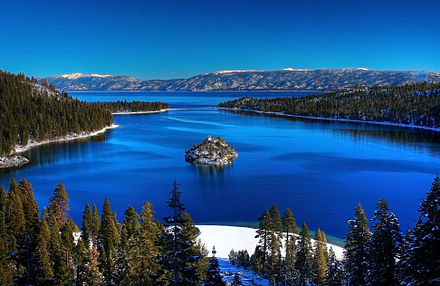

Image of Lake Tahoe (California/Nevada, USA) from Wikipedia. 

**Lake Tahoe famously doesn't freeze even though it's located high in the mountains. Why is that?**

In [ ]:
# The first step is to import functions that we'll need later on:

# Import pyplot, our plotting library
from matplotlib.pyplot import subplots, plot, show, twinx, xlabel, ylabel

# Imports from numpy, a library for working with arrays
from numpy import cos, linspace, pi,zeros_like,diff, zeros, min

## Part 1. Lake ice growth and the conservation of energy

We start out with a very simple statement of conservation of energy: that the change specific heat (i.e., heating reflected by temperature changes) is balanced by sources of heat. In equation form, we would say that,

$$ \text{Sensible heating} + \text{Sources of heat} = 0$$

The sensible heating is just the specific heat times the rate of temperature change:

$$ (\text{Specific Heat})(\text{Rate of Temperature Change})$$

The conservation of energy can then be re-written as,
$$ \text{Rate of Temperature Change} = \frac{\text{Sources of heat}}{\text{Specific Heat}} $$
or, using symbols:
$$ \frac{\Delta T}{\Delta t} = \frac{H}{c D}$$

In [14]:
c = 4184      # The volume specific heat, J/(m^3 deg C)
H = 1         # Surface heating, (J/s) / m^2
D = 100       # Ice thickness, m

### Question #1. 
In the next cell, calculate the rate of temperature change (right hand side of the last equation):

In [15]:
H/c/D

2.390057361376673e-06

If you didn't change any of the above definitions, your answer should have units of (degrees C)/s. 

### Question #2. 
What is the temperature change after one day? This can be calculated by writing,
$$ \Delta T = \Delta t \frac{H}{c D}$$

In [16]:
H/c/D * 86400

0.20650095602294455

You just calculated the depth-averaged temperature change caused by heating of one Joule for a period of one day.

### Question #3.
If the initial temperature was 1 deg C, what is the current temperature?

In [17]:
1 + H/c/D * 86400

1.2065009560229445

## Part 2. Changes through time.

Our goal is to calculate temperatures through the year.  To do this, we'll carry out basic "time stepping". Python **for loops** are perfect for this.  Here's an example of a for-loop:

In [18]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


For our purposes, we'll use a for-loop to calculate temperature changes $\Delta T$ through time. If we add the changes onto some base value, i.e., $T_i = T_{i-1} + \Delta T$. Here's how you would timestep for ten days:

In [37]:
time = linspace(0,10,37)   # Make an array of times
print(time)
dt = time[1] - time[0]
print(dt)

[ 0.          0.27777778  0.55555556  0.83333333  1.11111111  1.38888889
  1.66666667  1.94444444  2.22222222  2.5         2.77777778  3.05555556
  3.33333333  3.61111111  3.88888889  4.16666667  4.44444444  4.72222222
  5.          5.27777778  5.55555556  5.83333333  6.11111111  6.38888889
  6.66666667  6.94444444  7.22222222  7.5         7.77777778  8.05555556
  8.33333333  8.61111111  8.88888889  9.16666667  9.44444444  9.72222222
 10.        ]
0.2777777777777778


In [38]:
T = zeros_like(time)       # Initialize a numpy array to store the temperatures
T[i-1] = 10          
H,D = 1, 100

for i,current_time_step in enumerate(time):
    T[i] = T[i-1] + H / (c*D) * 86400 * dt
    print(f'The temperature on day {current_time_step} is {T[i]:.2f} deg C')

The temperature on day 0.0 is 0.06 deg C
The temperature on day 0.2777777777777778 is 0.11 deg C
The temperature on day 0.5555555555555556 is 0.17 deg C
The temperature on day 0.8333333333333334 is 0.23 deg C
The temperature on day 1.1111111111111112 is 0.29 deg C
The temperature on day 1.3888888888888888 is 0.34 deg C
The temperature on day 1.6666666666666667 is 0.40 deg C
The temperature on day 1.9444444444444446 is 0.46 deg C
The temperature on day 2.2222222222222223 is 0.52 deg C
The temperature on day 2.5 is 0.57 deg C
The temperature on day 2.7777777777777777 is 0.63 deg C
The temperature on day 3.055555555555556 is 0.69 deg C
The temperature on day 3.3333333333333335 is 0.75 deg C
The temperature on day 3.611111111111111 is 0.80 deg C
The temperature on day 3.8888888888888893 is 0.86 deg C
The temperature on day 4.166666666666667 is 0.92 deg C
The temperature on day 4.444444444444445 is 0.98 deg C
The temperature on day 4.722222222222222 is 1.03 deg C
The temperature on day 5.0 

### Plotting
Making plots is straightforward using pyplot. You just make a new figure, plot, and then show.

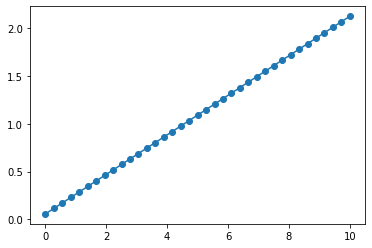

In [39]:
fig,ax = subplots()   # Make a new figure
plot(time,T,'-o')     # In the previous cell we printed the answer. This time, plot it instead.
show()

Now let's consider a diurnal heat flux. For simplicity, we'll just lump together everything that causes day-to-day changes in the heat flux into the same single variable, H.

Text(0, 0.5, 'Heat Flux (J)')

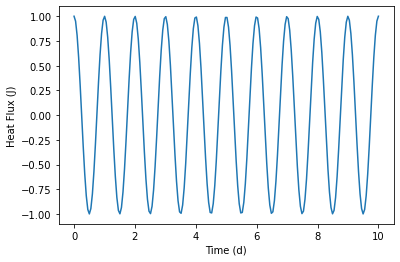

In [41]:
time = linspace(0,10,200)   # We need more dense sampling in time in order to resolve daily variations
dt = time[1] - time[0]
H = cos(2*pi*time)
fig,ax = subplots()         # Make a new figure
plot(time,H)
ax.set_xlabel('Time (d)')
ax.set_ylabel('Heat Flux (J)')

### Question #4.
Calculate and plot the temperature change if there is a daily heat flux variation

In [78]:
def calculate_lake_temperature(T0,D,H,time,dt):
#     D = 100
    T = zeros_like(H)           # Initialize a numpy array to store the temperatures
    T[-1]=T0                    # Set the initial temperature
    # Now, step through time:
    for i,current_time_step in enumerate(time):
        T[i] = T[i-1] + H[i] / c / D * 86400 *dt
        
    return T

In [79]:
T = calculate_lake_temperature(0.25,100,H,time,dt)

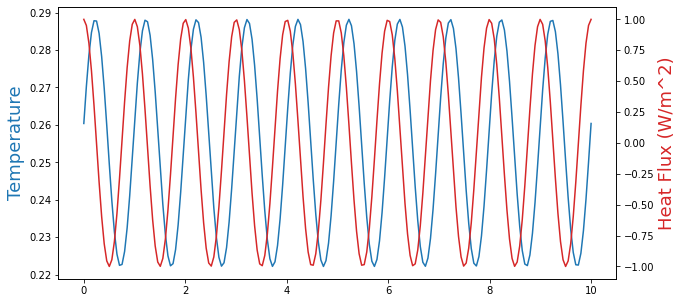

In [81]:
fig,ax = subplots(figsize=(10,5))         # Make a new figure    
plot(time,T)
ax2 = twinx(ax)
ax2.plot(time,H,'C3')
ax2.set_ylabel('Heat Flux (W/m^2)',color='C3',fontsize=18)
ax.set_ylabel('Temperature',color='C0',fontsize=18)
show()

We say that temperature and heat flux are *out of phase* since they are both sinusoidal but have a constant offset in time.

Now let's calculate the minimum temperature during these ten days:

In [58]:
min(T)

0.22218693216409555

### Question #5.
Repeat the last calculation with a shallower lake depth of 10m.

In [83]:
T = calculate_lake_temperature(0.25,10,H,time,dt)

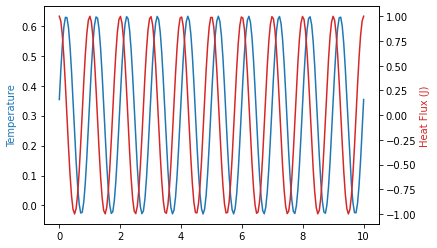

In [84]:
fig,ax = subplots()         # Make a new figure
plot(time,T)
ax2 = twinx(ax)
ax2.plot(time,H,'C3')
ax2.set_ylabel('Heat Flux (J)',color='C3')
ax.set_ylabel('Temperature',color='C0')
show()

In [85]:
min(T) # Again, calculate the minimum temperature. Is this number different than before?

-0.02813067835904347

### Question #6. 
Now, write a for-loop *over depth* to calculate the minimum temperature as a function of depth.  This is going to require writing two, "nested" for-loops, one inside of the other.  You'll also need to have two indices for T, one for time (like we had above) and one for depth.  To get you started, here's a new initialized array for the temperatures:

In [ ]:
D = linspace(1,100,50)       # Vary depth from 1 to 100 m, choosing 50 values in this range
T = zeros((len(H),len(D)))   # Initialize a numpy array to store the temperatures
T[-1]=0.25                   # Set the initial temperature

In [ ]:
#WRITE CODE HERE

### Question #7. 
Plot minimum temperature as a function of depth. Can you guess why this curve has the shape that it does? Is our model missing any important physics?

In [ ]:
#WRITE CODE HERE